## 📝 Problem Statement

**Goal** → Predict health risk levels (Low, Medium, High) based on AQI values and pollutants.

**Why?** → Helps citizens & policymakers understand risk to respiratory health.

**Type** → Multi-class classification problem.

In this project, we aim to:  
- Explore **Air Quality Data in India**  
- Focus on pollutants: **PM2.5, NO2, SO2**  
- Understand **missing values, data types, and summary statistics**  
- Prepare the dataset for **future risk analysis and visualization**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print('Libraries imported successfully!')
from sklearn.model_selection import GridSearchCV
import joblib


Libraries imported successfully!


In [38]:
df = pd.read_csv('city_day_filled.csv', parse_dates=['Date'])
print('Dataset loaded successfully!')

Dataset loaded successfully!


In this section, we will explore the dataset to understand its characteristics. We will look at the data types, summary statistics, and the distribution of key features. We will also create visualizations to identify trends and patterns.

## Exploratory Data Analysis (EDA)

In [39]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,-15.669017,178.929580,0.92,18.22,17.15,54.123493,0.92,27.64,133.36,0.00,0.02,0.00,28.746128,Moderate
1,Ahmedabad,2015-01-02,27.920434,297.015480,0.97,15.69,16.46,25.241901,0.97,24.55,34.06,3.68,5.50,3.77,156.953092,Moderate
2,Ahmedabad,2015-01-03,166.703769,201.625043,17.40,19.30,29.70,38.216233,17.40,29.07,30.70,6.80,16.40,2.25,33.573500,Moderate
3,Ahmedabad,2015-01-04,27.952039,207.883909,1.70,18.48,17.97,7.566766,1.70,18.59,36.08,4.43,10.14,1.00,150.870260,Moderate
4,Ahmedabad,2015-01-05,89.884918,46.150051,22.10,21.42,37.76,24.849399,22.10,39.33,39.31,7.01,18.89,2.78,127.487037,Moderate


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [41]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,67.252456,117.948770,17.591381,28.646197,32.222485,23.550952,2.233937,14.496146,34.492663,3.185453,8.706831,3.089832,166.535142
min,2015-01-01 00:00:00,-169.514708,-232.584838,-56.215452,-59.440827,-73.028519,-65.984128,-20.110636,-57.139043,-54.794073,-54.843181,-76.552618,-22.100759,-295.869141
25%,2017-04-16 00:00:00,28.410041,56.220000,5.520000,11.820000,12.700000,8.148208,0.490000,5.565000,18.943122,0.050000,0.330000,0.000000,81.000000
50%,2018-08-05 00:00:00,50.360000,102.510000,10.260000,22.440000,24.300000,18.060000,0.900000,9.430000,31.330000,1.130000,3.550000,1.893481,122.000000
75%,2019-09-03 00:00:00,85.675000,162.427003,22.060000,38.840000,42.415000,34.260000,1.530000,16.532519,46.055000,3.870000,12.820000,6.162337,221.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,64.646291,90.751398,22.761511,24.443636,31.588282,25.631697,6.969622,18.138290,21.690791,15.836087,20.016328,6.361318,140.513733


In [42]:
def assign_health_risk(aqi_bucket):
    if aqi_bucket in ['Good', 'Satisfactory']:
        return 'Low Risk'
    elif aqi_bucket == 'Moderate':
        return 'Medium Risk'
    elif aqi_bucket in ['Poor', 'Very Poor', 'Severe']:
        return 'High Risk'
    return 'Unknown'

df['Health_Risk'] = df['AQI_Bucket'].apply(assign_health_risk)
df_for_viz = df.copy()
df = df.drop(columns=['Date', 'AQI_Bucket'])
print('Feature engineering complete.')

Feature engineering complete.


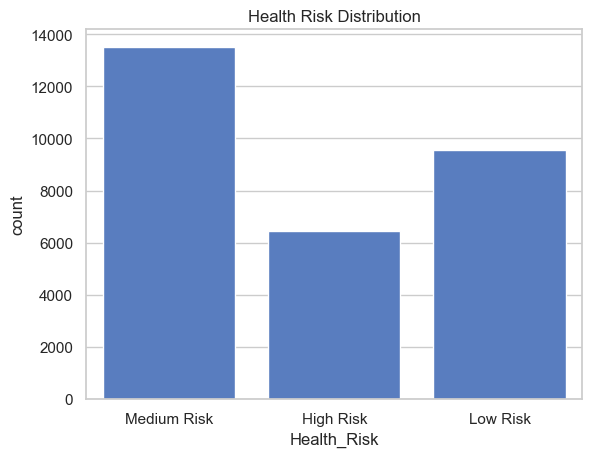

In [43]:
sns.countplot(x='Health_Risk', data=df_for_viz)
plt.title('Health Risk Distribution')
plt.show()

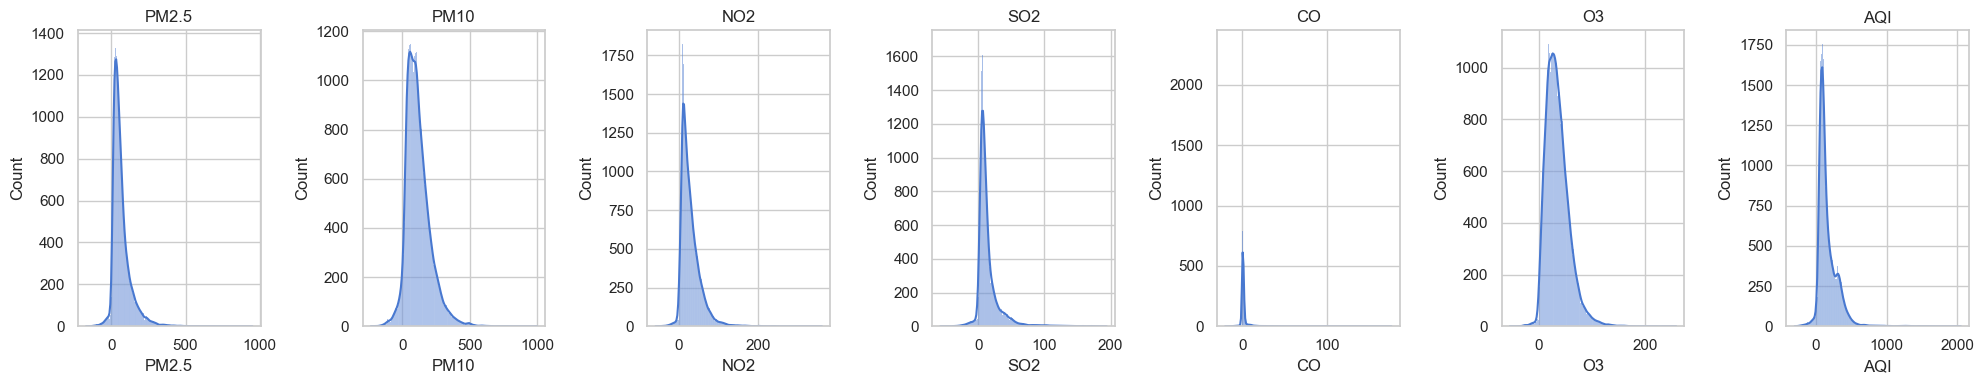

In [44]:
num_cols = ['PM2.5','PM10','NO2','SO2','CO','O3','AQI']
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 4))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

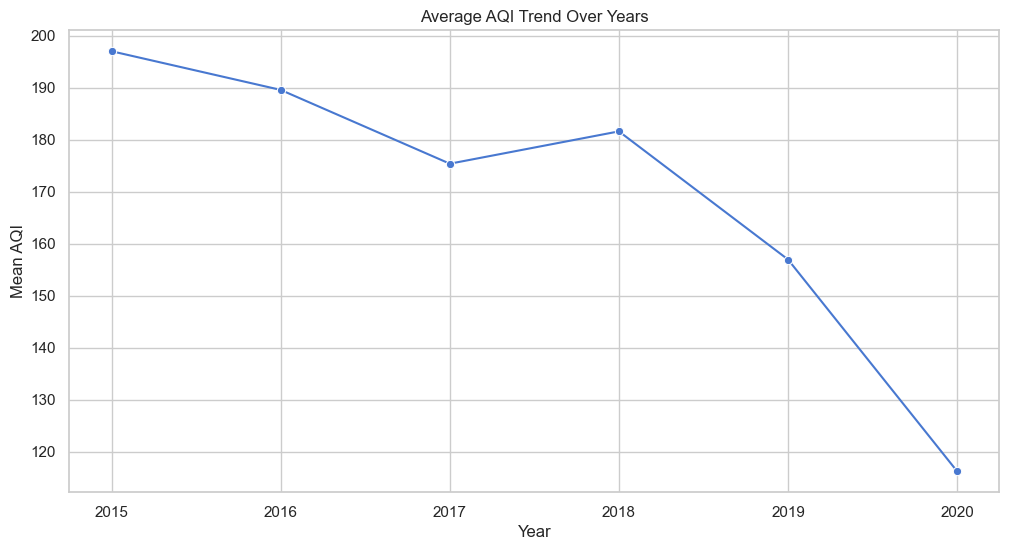

In [59]:
# Add this to your EDA section
plt.figure(figsize=(12, 6))
aqi_by_year = df_for_viz.groupby('Year')['AQI'].mean()
sns.lineplot(x=aqi_by_year.index, y=aqi_by_year.values, marker='o')
plt.title('Average AQI Trend Over Years')
plt.ylabel('Mean AQI')
plt.show()

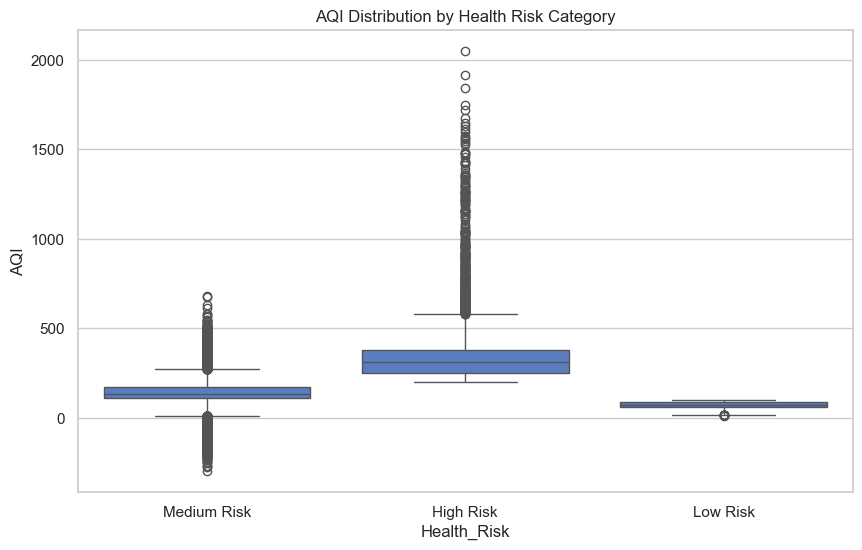

In [60]:
# Add this to your EDA section
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health_Risk', y='AQI', data=df_for_viz)
plt.title('AQI Distribution by Health Risk Category')
plt.show()

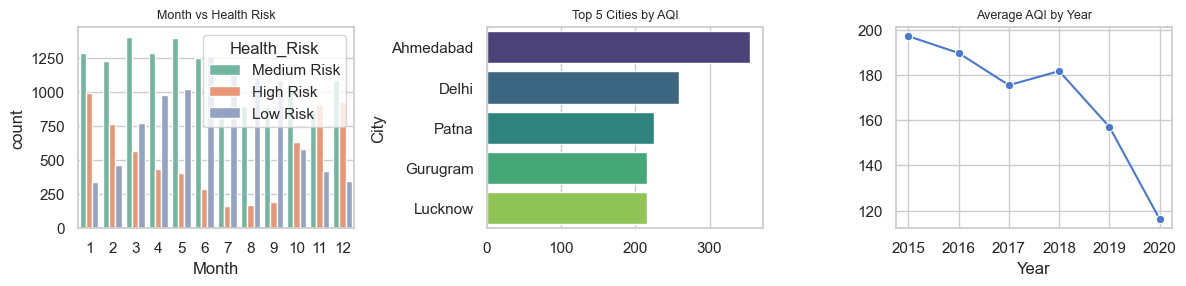

In [45]:
df_for_viz['Month'] = df_for_viz['Date'].dt.month
df_for_viz['Year'] = df_for_viz['Date'].dt.year
fig,ax=plt.subplots(1,3,figsize=(12,3))
sns.countplot(x='Month',hue='Health_Risk',data=df_for_viz,palette='Set2',ax=ax[0])
ax[0].set_title('Month vs Health Risk',fontsize=9)
c=df_for_viz.groupby('City')['AQI'].mean().nlargest(5)
sns.barplot(x=c.values,y=c.index,hue=c.index,legend=False,palette='viridis',ax=ax[1])
ax[1].set_title('Top 5 Cities by AQI',fontsize=9)
y=df_for_viz.groupby('Year')['AQI'].mean()
sns.lineplot(x=y.index,y=y.values,marker='o',ax=ax[2])
ax[2].set_title('Average AQI by Year',fontsize=9)
plt.tight_layout(pad=1);plt.show()

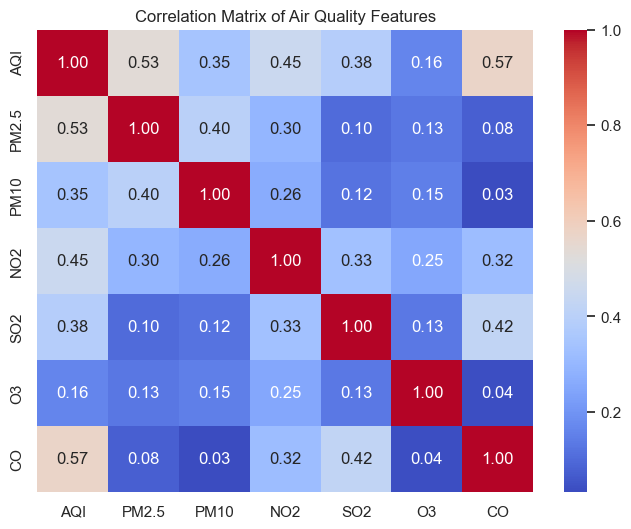

In [46]:
selected_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Features')
plt.show()

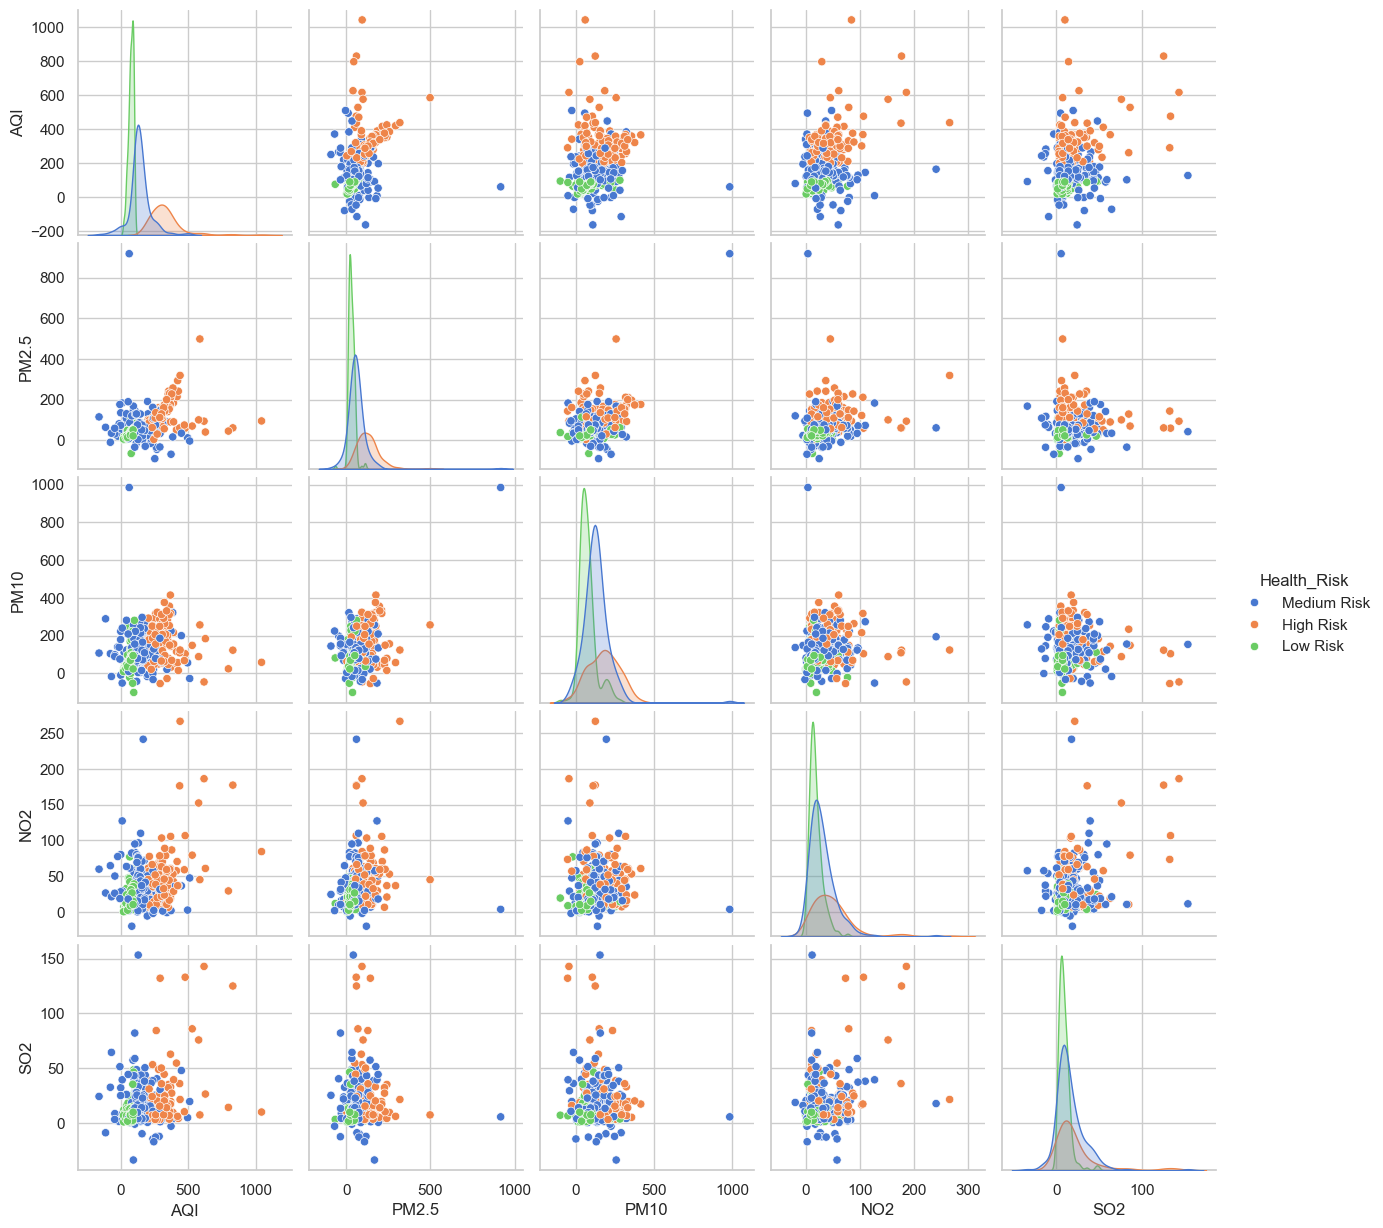

In [47]:
selected_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2']
sns.pairplot(df_for_viz.sample(500), vars=selected_cols, hue='Health_Risk')
plt.show()

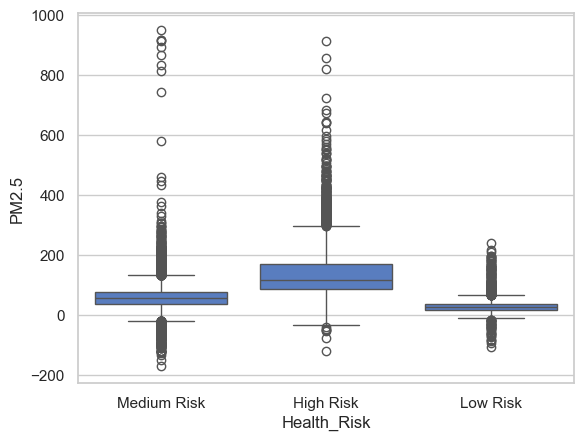

In [48]:
sns.boxplot(x='Health_Risk', y='PM2.5', data=df_for_viz)
plt.show()

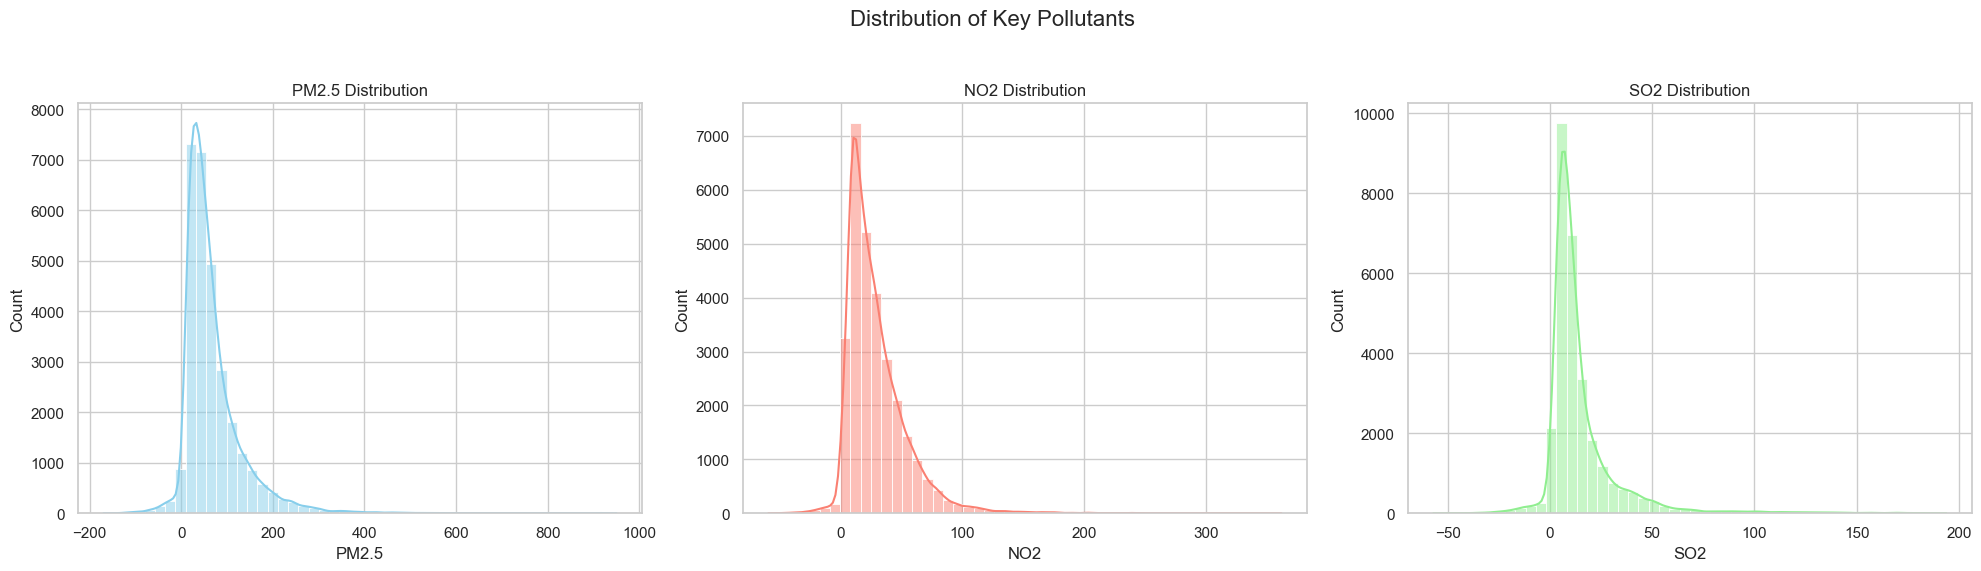

In [49]:
sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Key Pollutants', fontsize=16)

sns.histplot(df['PM2.5'].dropna(), bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('PM2.5 Distribution')

sns.histplot(df['NO2'].dropna(), bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('NO2 Distribution')

sns.histplot(df['SO2'].dropna(), bins=50, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('SO2 Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Data preprocessing is a crucial step in any machine learning project. In this section, we will clean the data, create new features, and prepare the data for modeling.

## Data Preprocessing

In [50]:
columns_to_clean = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].clip(lower=0)
print('Negative values cleaned.')

Negative values cleaned.


In [51]:
le = LabelEncoder()
df['Health_Risk'] = le.fit_transform(df['Health_Risk'])
X = df.drop('Health_Risk', axis=1)
y = df['Health_Risk']
X = pd.get_dummies(X, columns=['City'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Data split and scaled.')

Data split and scaled.


### 1. Logistic Regression

Logistic Regression is a good baseline model for classification tasks. It's simple, interpretable, and fast to train.

--- Logistic Regression ---
Training time: 0.19 seconds
Accuracy: 0.8510
              precision    recall  f1-score   support

   High Risk       0.83      0.90      0.86      1292
    Low Risk       0.83      0.92      0.87      1913
 Medium Risk       0.88      0.78      0.83      2702

    accuracy                           0.85      5907
   macro avg       0.85      0.87      0.85      5907
weighted avg       0.85      0.85      0.85      5907



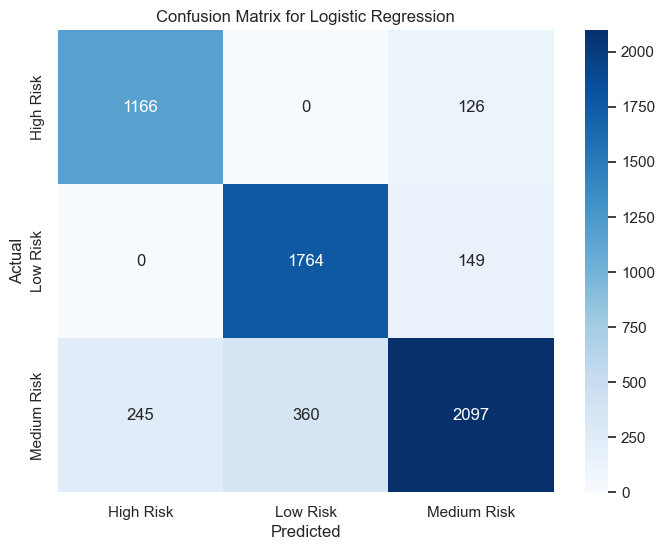

In [52]:
print('--- Logistic Regression ---')
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f'Training time: {end_time - start_time:.2f} seconds')

y_pred_lr = lr_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2. Decision Tree

A Decision Tree is a non-linear model that is easy to understand and visualize. It learns a set of rules to make predictions.

--- Decision Tree ---
Training time: 0.58 seconds
Accuracy: 0.9650
              precision    recall  f1-score   support

   High Risk       0.95      0.94      0.94      1292
    Low Risk       0.98      0.98      0.98      1913
 Medium Risk       0.96      0.96      0.96      2702

    accuracy                           0.96      5907
   macro avg       0.96      0.96      0.96      5907
weighted avg       0.96      0.96      0.96      5907



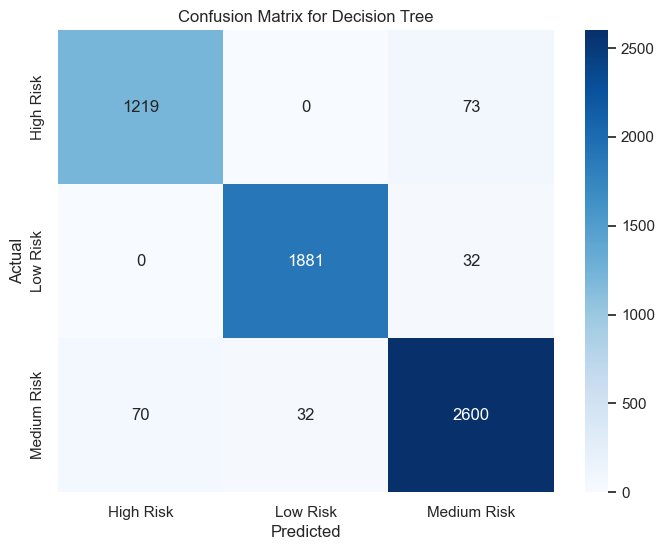

In [53]:
print('--- Decision Tree ---')
start_time = time.time()
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f'Training time: {end_time - start_time:.2f} seconds')

y_pred_dt = dt_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 3. Random Forest

A Random Forest is an ensemble model that combines multiple Decision Trees to produce a more robust and accurate model. It's one of the most popular and effective classification models.

--- Random Forest ---
Training time: 0.70 seconds
Accuracy: 0.9773
              precision    recall  f1-score   support

   High Risk       0.95      0.97      0.96      1292
    Low Risk       0.99      0.99      0.99      1913
 Medium Risk       0.98      0.97      0.98      2702

    accuracy                           0.98      5907
   macro avg       0.97      0.98      0.98      5907
weighted avg       0.98      0.98      0.98      5907



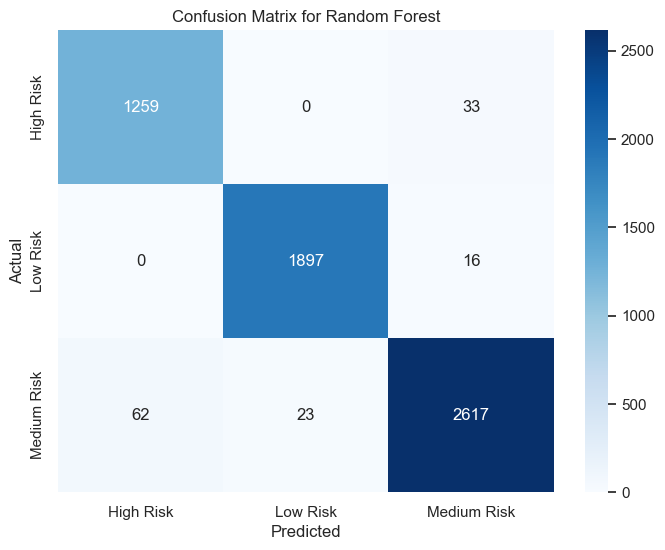

In [54]:
print('--- Random Forest ---')
start_time = time.time()
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f'Training time: {end_time - start_time:.2f} seconds')

y_pred_rf = rf_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Hyperparameter Tuning with GridSearchCV

To improve our Random Forest model, we can tune its hyperparameters. We'll use GridSearchCV to search for the best combination of hyperparameters.

In [61]:
# After training all three models, you can add this:
from sklearn.metrics import f1_score

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest (Tuned)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_best_rf)
    ],
    'F1-Score (Weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_best_rf, average='weighted')
    ]
})

print(results.sort_values(by='F1-Score (Weighted)', ascending=False))

                   Model  Accuracy  F1-Score (Weighted)
2  Random Forest (Tuned)  0.977146             0.977175
1          Decision Tree  0.964957             0.964952
0    Logistic Regression  0.851024             0.849814


In [55]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train_scaled, y_train)

print('Best parameters found: ', grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print(f'Accuracy of tuned model: {accuracy_score(y_test, y_pred_best_rf):.4f}')
print(classification_report(y_test, y_pred_best_rf, target_names=le.classes_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of tuned model: 0.9771
              precision    recall  f1-score   support

   High Risk       0.95      0.98      0.96      1292
    Low Risk       0.99      0.99      0.99      1913
 Medium Risk       0.99      0.96      0.97      2702

    accuracy                           0.98      5907
   macro avg       0.97      0.98      0.98      5907
weighted avg       0.98      0.98      0.98      5907



## Feature Importance

Let's look at which features our Random Forest model found most important.

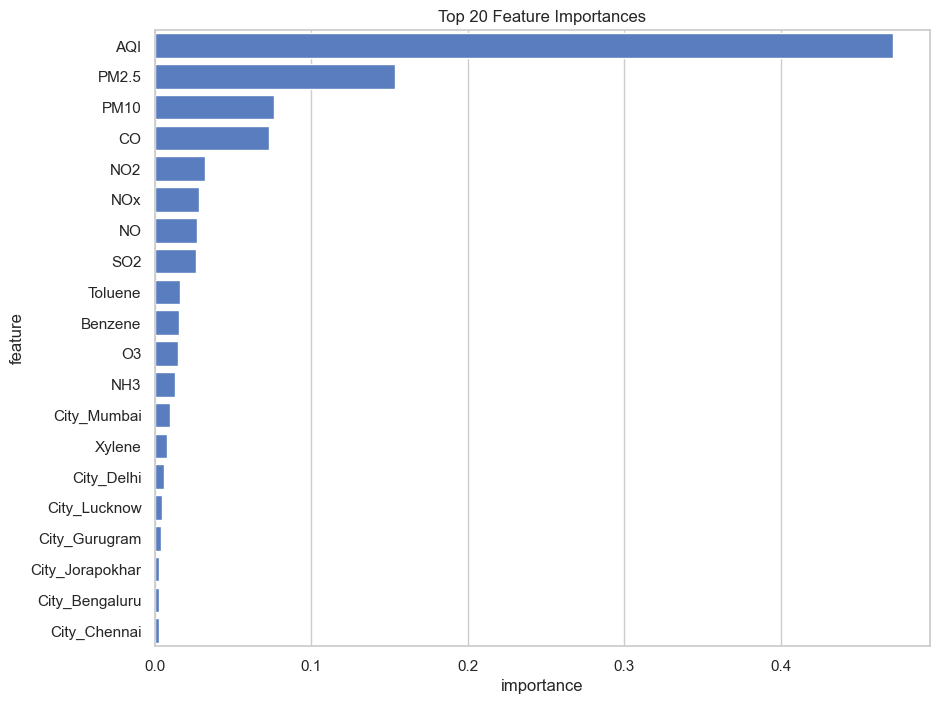

In [56]:
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 20 Feature Importances')
plt.show()

## Save the Best Model

Finally, we'll save our tuned Random Forest model for future use.

In [57]:
joblib.dump(best_rf_model, 'health_risk_model.pkl')
print('Model saved to health_risk_model.pkl')

Model saved to health_risk_model.pkl


## Conclusion

In this project, we successfully built and evaluated several models to predict health risk based on air quality data. The Random Forest model, especially after hyperparameter tuning, performed the best. We also identified the most important features for the prediction. The saved model can now be used to make predictions on new data.

In [58]:
import json
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'le.pkl')

with open('columns.json', 'w') as f:
    json.dump(X.columns.tolist(), f)

print('Scaler, Label Encoder, and columns saved.')

Scaler, Label Encoder, and columns saved.
